In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Считываем данные

In [3]:
data = pd.read_csv("HW/3/train.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dt = pd.to_datetime(data["datetime"])
data["hour"] = dt.map(lambda x: x.hour)
data["day"] = dt.map(lambda x: x.day)
data["month"] = dt.map(lambda x: x.month)
data["year"] = dt.map(lambda x: x.year)
data = data.drop(['datetime', 'registered', 'atemp'], axis=1)
data.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,hour,day,month,year
0,1,0,0,1,9.84,81,0.0,3,16,0,1,1,2011
1,1,0,0,1,9.02,80,0.0,8,40,1,1,1,2011
2,1,0,0,1,9.02,80,0.0,5,32,2,1,1,2011
3,1,0,0,1,9.84,75,0.0,3,13,3,1,1,2011
4,1,0,0,1,9.84,75,0.0,0,1,4,1,1,2011


In [5]:
data.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
humidity        int64
windspeed     float64
casual          int64
count           int64
hour            int64
day             int64
month           int64
year            int64
dtype: object

Делаем категориальные признаки

In [6]:
data["season"] = data["season"].astype('category')
data["holiday"] = data["holiday"].astype('category')
data["workingday"] = data["workingday"].astype('category')
data["weather"] = data["weather"].astype('category')
data["month"] = data["month"].astype('category')
data["day"] = data["day"].astype('category')
data["hour"] = data["hour"].astype('category')

data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
humidity         int64
windspeed      float64
casual           int64
count            int64
hour          category
day           category
month         category
year             int64
dtype: object

In [7]:
X = data.drop(columns=['count'], axis=1)
Y = data['count']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

Регрессия с категориальными признаками

In [8]:
scaler = StandardScaler()
scaler.fit(X_train, Y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

TypeError: '<' not supported between instances of 'CategoricalDtype' and 'CategoricalDtype'

In [9]:
categ_regr = SGDRegressor()
categ_regr.fit(X_train_scaled, Y_train)
mean_squared_error(Y_test, categ_regr.predict(X_test_scaled))

NameError: name 'X_train_scaled' is not defined

Регрессия без категориальных признаков

In [10]:
X_wo_categ = X.drop(columns=["season", "holiday", "workingday", "weather", "month", "day", "hour"])
Y_wo_categ = Y.drop(columns=["season", "holiday", "workingday", "weather", "month", "day", "hour"])
X_train_wo_categ, X_test_wo_categ, Y_train_wo_categ, Y_test_wo_categ = train_test_split(X_wo_categ, Y_wo_categ , test_size=0.3, random_state=27)

In [11]:
scaler_wo_categ = StandardScaler()
scaler_wo_categ.fit(X_train_wo_categ, Y_train_wo_categ)
X_train_wo_categ_scaled = scaler_wo_categ.transform(X_train_wo_categ)
X_test_wo_categ_scaled = scaler_wo_categ.transform(X_test_wo_categ)

In [12]:
wo_categ_regr = SGDRegressor()
wo_categ_regr.fit(X_train_wo_categ_scaled, Y_train_wo_categ)
mean_squared_error(Y_test_wo_categ, wo_categ_regr.predict(X_test_wo_categ_scaled))

16245.363476525585

Регрессия с one-hot-encode

In [13]:
one_hot_encoder = OneHotEncoder(sparse=False)
X_ohe = one_hot_encoder.fit_transform(X[['season', 'holiday', 'workingday', 'weather', 'month', 'day','hour']])
X_ohe_train, X_ohe_test, Y_ohe_train, Y_ohe_test = train_test_split(X_ohe, Y, test_size=0.3, random_state=27)

In [14]:
scaler_ohe = StandardScaler()
scaler_ohe.fit(X_ohe_train, Y_ohe_train)
X_train_ohe_scaled = scaler_ohe.transform(X_ohe_train)
X_test_ohe_scaled = scaler_ohe.transform(X_ohe_test)

In [15]:
ohe_categ_regr = SGDRegressor(tol=1e-3)
ohe_categ_regr.fit(X_train_ohe_scaled, Y_ohe_train)
mean_squared_error(Y_ohe_test, ohe_categ_regr.predict(X_test_ohe_scaled))

13240.43515815989

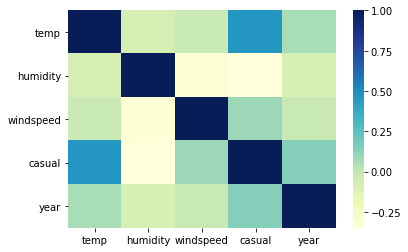

In [377]:
sn.heatmap(X.corr(), cmap="YlGnBu")

In [22]:
one_hot_encoder = OneHotEncoder(sparse=False, categories='auto')
X_ohe = one_hot_encoder.fit_transform(X)
X_ohe_train, X_ohe_test, Y_ohe_train, Y_ohe_test = train_test_split(X_ohe, Y, test_size=0.3, random_state=27)

In [23]:
scaler_ohe = StandardScaler()
scaler_ohe.fit(X_ohe_train, Y_ohe_train)
X_train_ohe_scaled = scaler_ohe.transform(X_ohe_train)
X_test_ohe_scaled = scaler_ohe.transform(X_ohe_test)

In [24]:
ohe_categ_regr = SGDRegressor(tol=1e-3)
ohe_categ_regr.fit(X_train_ohe_scaled, Y_ohe_train)
mean_squared_error(Y_ohe_test, ohe_categ_regr.predict(X_test_ohe_scaled))

5791803199186.8